In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns
from statannotations.Annotator import Annotator
import pandas as pd

In [10]:
df = pd.read_excel('/mnt/d/pet_mri_allison/Resultados_Mutual_Information.xlsx')
df1 = pd.DataFrame(df)
df1

,Method,elastix,ants
0,FOV,0.211323,0.272671
1,FOV,0.239679,0.312040
2,FOV,0.182510,0.223310
3,FOV,0.237418,0.250929
4,FOV,0.272928,0.276287
5,FOV,0.304516,0.314438
6,FOV,0.246355,0.265073
7,FOV,0.298110,0.295851
8,FOV,0.261712,0.276094
9,FOV,0.181906,0.232687


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Cerebro_Elastix vs. Cerebro_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:3.793e-01 U_stat=1.670e+02
FOV_Elastix vs. FOV_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:1.436e-02 U_stat=1.090e+02
Sustancia gris_Elastix vs. Sustancia gris_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:8.392e-01 U_stat=1.920e+02


(<AxesSubplot:xlabel='Method', ylabel='Elastix'>,
  <statannotations.Annotation.Annotation at 0x7fad16a10f10>])

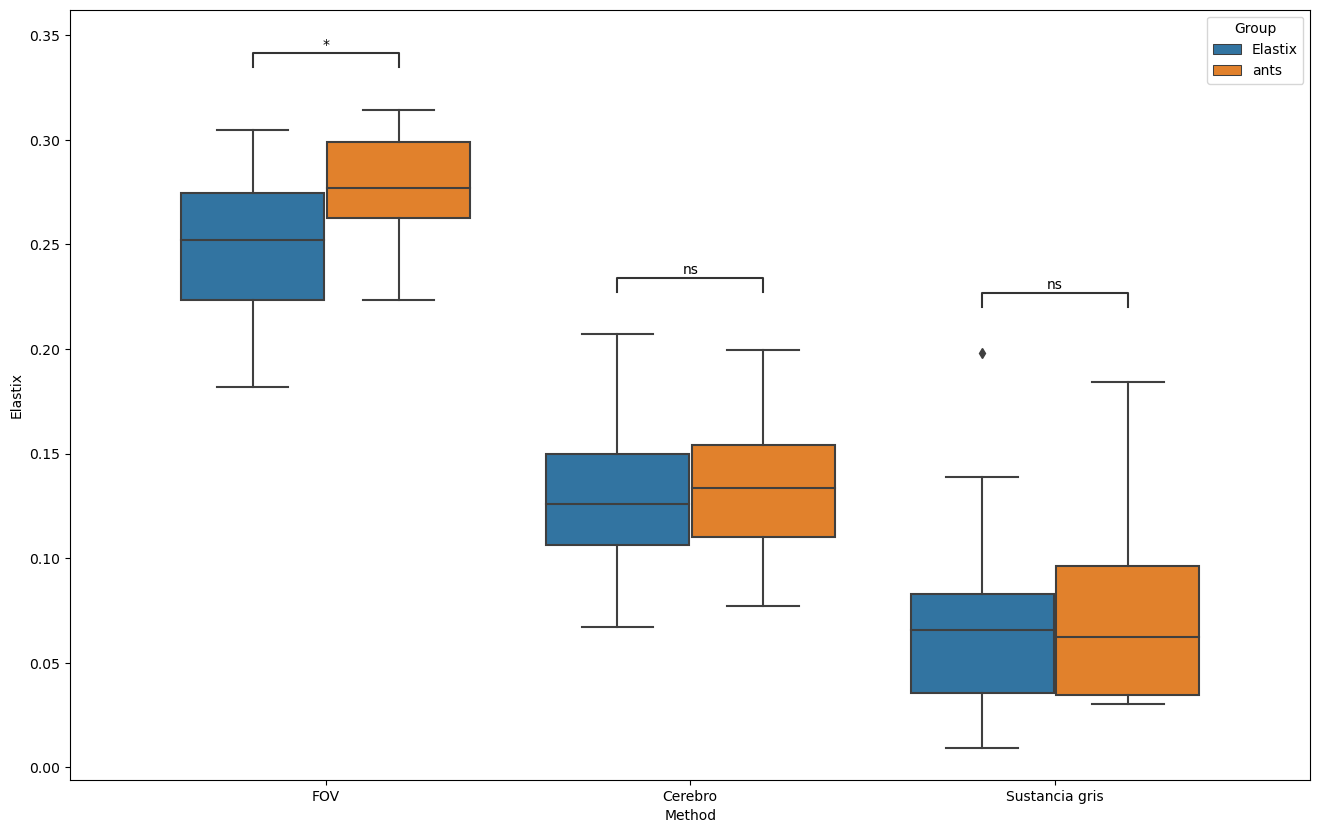

In [11]:
df_dsc_gm = df1.filter(['elastix','Method'], axis=1)
df_dsc_gm.insert(0, 'Group', 'Elastix')
df_dsc_gm.rename(columns={'elastix': 'Elastix'}, inplace=True)

df_cdsc_gm = df1.filter(['ants','Method'], axis=1)
df_cdsc_gm.insert(0, 'Group', 'ants')
df_cdsc_gm.rename(columns={'ants': 'Elastix'}, inplace=True)

frames = [df_dsc_gm, df_cdsc_gm]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_gm = sns.boxplot(data=result_gm, x="Method", y="Elastix", hue="Group",notch=False)

pairs=[(("FOV", "Elastix"), ("FOV", "ants")),
      (("Cerebro", "Elastix"), ("Cerebro", "ants")),
      (("Sustancia gris", "Elastix"), ("Sustancia gris", "ants"))]
annotator_gm = Annotator(ax_gm, pairs, data=result_gm, x="Method", y="Elastix", hue='Group')#, order=order)
annotator_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_gm.apply_and_annotate()


In [12]:
df = pd.read_excel('/mnt/d/pet_mri_allison/Resultados_Mutual_Information.xlsx')
df1 = pd.DataFrame(df)
df1

,Method,elastix,ants
0,Parietal,0.251481,0.277147
1,Parietal,0.128638,0.207187
2,Parietal,0.244418,0.250010
3,Parietal,0.257447,0.258038
4,Parietal,0.231138,0.226170
...,...,...,...
215,Ventriculos laterales,0.011051,0.023753
216,Ventriculos laterales,0.119319,0.156881
217,Ventriculos laterales,0.036402,0.047921
218,Ventriculos laterales,0.008397,0.009838


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Putamen_Elastix vs. Putamen_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:2.977e-01 U_stat=1.610e+02
Ventriculos laterales_Elastix vs. Ventriculos laterales_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:5.428e-01 U_stat=1.770e+02
Globus pallidum_Elastix vs. Globus pallidum_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:1.333e-01 U_stat=1.440e+02
Frontal_Elastix vs. Frontal_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:3.648e-01 U_stat=1.660e+02
Parietal_Elastix vs. Parietal_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:5.250e-01 U_stat=1.760e+02
Temporal_Elastix vs. Temporal_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:1.136e-01 U_stat=1.410e+02
Occipital_Elastix vs. Occipital_ants: Mann-Whitney-Wilcoxon test two-sided, P_val:7.150e-01 U_stat=1.860e+02
Cerebelo_Elastix vs. Cerebelo_an

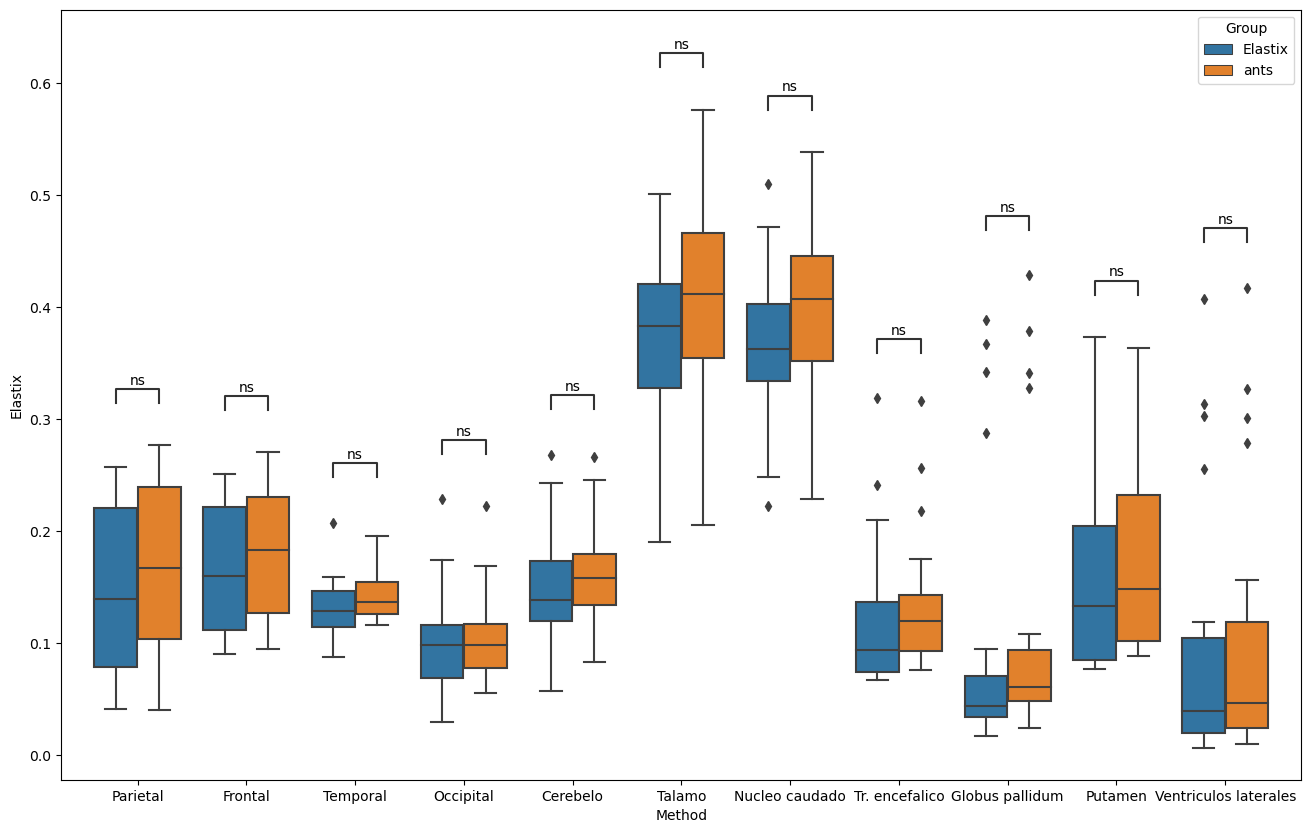

In [13]:
df_dsc_gm = df1.filter(['elastix','Method'], axis=1)
df_dsc_gm.insert(0, 'Group', 'Elastix')
df_dsc_gm.rename(columns={'elastix': 'Elastix'}, inplace=True)

df_cdsc_gm = df1.filter(['ants','Method'], axis=1)
df_cdsc_gm.insert(0, 'Group', 'ants')
df_cdsc_gm.rename(columns={'ants': 'Elastix'}, inplace=True)

frames = [df_dsc_gm, df_cdsc_gm]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_gm = sns.boxplot(data=result_gm, x="Method", y="Elastix", hue="Group",notch=False)

pairs=[(("Parietal", "Elastix"), ("Parietal", "ants")),
      (("Frontal", "Elastix"), ("Frontal", "ants")),
      (("Temporal", "Elastix"), ("Temporal", "ants")),
      (("Occipital", "Elastix"), ("Occipital", "ants")),
      (("Cerebelo", "Elastix"), ("Cerebelo", "ants")),
      (("Talamo", "Elastix"), ("Talamo", "ants")),
      (("Nucleo caudado", "Elastix"), ("Nucleo caudado", "ants")),
      (("Tr. encefalico", "Elastix"), ("Tr. encefalico", "ants")),
      (("Globus pallidum", "Elastix"), ("Globus pallidum", "ants")),
      (("Putamen", "Elastix"), ("Putamen", "ants")),
      (("Ventriculos laterales", "Elastix"), ("Ventriculos laterales", "ants"))]
annotator_gm = Annotator(ax_gm, pairs, data=result_gm, x="Method", y="Elastix", hue='Group')#, order=order)
annotator_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_gm.apply_and_annotate()

plt.savefig('MI_parte_2.pdf')